In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
data = pd.read_csv('F:\my project\dataset\learning_dataset\\international-airline-passengers.csv')
data.dropna(axis=0, inplace=True)
data

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0


In [70]:
y = data.iloc[:, 1].values
y

array([112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104.,
       118., 115., 126., 141., 135., 125., 149., 170., 170., 158., 133.,
       114., 140., 145., 150., 178., 163., 172., 178., 199., 199., 184.,
       162., 146., 166., 171., 180., 193., 181., 183., 218., 230., 242.,
       209., 191., 172., 194., 196., 196., 236., 235., 229., 243., 264.,
       272., 237., 211., 180., 201., 204., 188., 235., 227., 234., 264.,
       302., 293., 259., 229., 203., 229., 242., 233., 267., 269., 270.,
       315., 364., 347., 312., 274., 237., 278., 284., 277., 317., 313.,
       318., 374., 413., 405., 355., 306., 271., 306., 315., 301., 356.,
       348., 355., 422., 465., 467., 404., 347., 305., 336., 340., 318.,
       362., 348., 363., 435., 491., 505., 404., 359., 310., 337., 360.,
       342., 406., 396., 420., 472., 548., 559., 463., 407., 362., 405.,
       417., 391., 419., 461., 472., 535., 622., 606., 508., 461., 390.,
       432.])

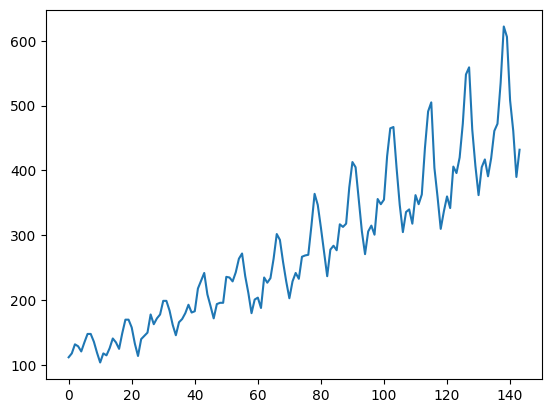

In [71]:
plt.plot(y)

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [73]:
y = y / np.max(y)
y

array([0.18006431, 0.18971061, 0.21221865, 0.2073955 , 0.19453376,
       0.2170418 , 0.23794212, 0.23794212, 0.21864952, 0.19131833,
       0.16720257, 0.18971061, 0.18488746, 0.20257235, 0.2266881 ,
       0.2170418 , 0.20096463, 0.23954984, 0.2733119 , 0.2733119 ,
       0.25401929, 0.21382637, 0.18327974, 0.22508039, 0.23311897,
       0.24115756, 0.28617363, 0.26205788, 0.27652733, 0.28617363,
       0.31993569, 0.31993569, 0.29581994, 0.26045016, 0.23472669,
       0.26688103, 0.27491961, 0.28938907, 0.31028939, 0.29099678,
       0.29421222, 0.35048232, 0.36977492, 0.38906752, 0.33601286,
       0.30707395, 0.27652733, 0.31189711, 0.31511254, 0.31511254,
       0.37942122, 0.3778135 , 0.3681672 , 0.39067524, 0.4244373 ,
       0.43729904, 0.38102894, 0.3392283 , 0.28938907, 0.32315113,
       0.32797428, 0.3022508 , 0.3778135 , 0.36495177, 0.37620579,
       0.4244373 , 0.48553055, 0.47106109, 0.41639871, 0.3681672 ,
       0.32636656, 0.3681672 , 0.38906752, 0.37459807, 0.42926

In [74]:
train = y[:int(0.6 * len(y))]
test = y[int(0.6 * len(y)):]

In [75]:
train

array([0.18006431, 0.18971061, 0.21221865, 0.2073955 , 0.19453376,
       0.2170418 , 0.23794212, 0.23794212, 0.21864952, 0.19131833,
       0.16720257, 0.18971061, 0.18488746, 0.20257235, 0.2266881 ,
       0.2170418 , 0.20096463, 0.23954984, 0.2733119 , 0.2733119 ,
       0.25401929, 0.21382637, 0.18327974, 0.22508039, 0.23311897,
       0.24115756, 0.28617363, 0.26205788, 0.27652733, 0.28617363,
       0.31993569, 0.31993569, 0.29581994, 0.26045016, 0.23472669,
       0.26688103, 0.27491961, 0.28938907, 0.31028939, 0.29099678,
       0.29421222, 0.35048232, 0.36977492, 0.38906752, 0.33601286,
       0.30707395, 0.27652733, 0.31189711, 0.31511254, 0.31511254,
       0.37942122, 0.3778135 , 0.3681672 , 0.39067524, 0.4244373 ,
       0.43729904, 0.38102894, 0.3392283 , 0.28938907, 0.32315113,
       0.32797428, 0.3022508 , 0.3778135 , 0.36495177, 0.37620579,
       0.4244373 , 0.48553055, 0.47106109, 0.41639871, 0.3681672 ,
       0.32636656, 0.3681672 , 0.38906752, 0.37459807, 0.42926

In [76]:
test

array([0.5096463 , 0.50321543, 0.51125402, 0.60128617, 0.66398714,
       0.6511254 , 0.57073955, 0.49196141, 0.43569132, 0.49196141,
       0.50643087, 0.48392283, 0.57234727, 0.55948553, 0.57073955,
       0.67845659, 0.74758842, 0.75080386, 0.64951768, 0.55787781,
       0.4903537 , 0.54019293, 0.54662379, 0.51125402, 0.58199357,
       0.55948553, 0.58360129, 0.69935691, 0.78938907, 0.81189711,
       0.64951768, 0.57717042, 0.49839228, 0.54180064, 0.57877814,
       0.54983923, 0.65273312, 0.63665595, 0.67524116, 0.75884244,
       0.88102894, 0.89871383, 0.74437299, 0.65434084, 0.58199357,
       0.6511254 , 0.67041801, 0.62861736, 0.67363344, 0.74115756,
       0.75884244, 0.86012862, 1.        , 0.97427653, 0.81672026,
       0.74115756, 0.62700965, 0.69453376])

In [77]:
train.shape

(86,)

In [78]:
def make_dataset(dataset_, look_back: int):
    if look_back < len(dataset_):
        data_out = []
        label_out = []
        for i in range(len(dataset_) - look_back):
            data_out.append(dataset_[i:i + look_back])
            label_out.append(dataset_[i + look_back])
    else:
        return False
    return np.array(data_out), np.array(label_out)

In [79]:
y

array([0.18006431, 0.18971061, 0.21221865, 0.2073955 , 0.19453376,
       0.2170418 , 0.23794212, 0.23794212, 0.21864952, 0.19131833,
       0.16720257, 0.18971061, 0.18488746, 0.20257235, 0.2266881 ,
       0.2170418 , 0.20096463, 0.23954984, 0.2733119 , 0.2733119 ,
       0.25401929, 0.21382637, 0.18327974, 0.22508039, 0.23311897,
       0.24115756, 0.28617363, 0.26205788, 0.27652733, 0.28617363,
       0.31993569, 0.31993569, 0.29581994, 0.26045016, 0.23472669,
       0.26688103, 0.27491961, 0.28938907, 0.31028939, 0.29099678,
       0.29421222, 0.35048232, 0.36977492, 0.38906752, 0.33601286,
       0.30707395, 0.27652733, 0.31189711, 0.31511254, 0.31511254,
       0.37942122, 0.3778135 , 0.3681672 , 0.39067524, 0.4244373 ,
       0.43729904, 0.38102894, 0.3392283 , 0.28938907, 0.32315113,
       0.32797428, 0.3022508 , 0.3778135 , 0.36495177, 0.37620579,
       0.4244373 , 0.48553055, 0.47106109, 0.41639871, 0.3681672 ,
       0.32636656, 0.3681672 , 0.38906752, 0.37459807, 0.42926

In [80]:
type(y)

numpy.ndarray

In [81]:
y.shape

(144,)

In [82]:
step = 5

In [83]:
make_dataset(y, step)

(array([[0.18006431, 0.18971061, 0.21221865, 0.2073955 , 0.19453376],
        [0.18971061, 0.21221865, 0.2073955 , 0.19453376, 0.2170418 ],
        [0.21221865, 0.2073955 , 0.19453376, 0.2170418 , 0.23794212],
        [0.2073955 , 0.19453376, 0.2170418 , 0.23794212, 0.23794212],
        [0.19453376, 0.2170418 , 0.23794212, 0.23794212, 0.21864952],
        [0.2170418 , 0.23794212, 0.23794212, 0.21864952, 0.19131833],
        [0.23794212, 0.23794212, 0.21864952, 0.19131833, 0.16720257],
        [0.23794212, 0.21864952, 0.19131833, 0.16720257, 0.18971061],
        [0.21864952, 0.19131833, 0.16720257, 0.18971061, 0.18488746],
        [0.19131833, 0.16720257, 0.18971061, 0.18488746, 0.20257235],
        [0.16720257, 0.18971061, 0.18488746, 0.20257235, 0.2266881 ],
        [0.18971061, 0.18488746, 0.20257235, 0.2266881 , 0.2170418 ],
        [0.18488746, 0.20257235, 0.2266881 , 0.2170418 , 0.20096463],
        [0.20257235, 0.2266881 , 0.2170418 , 0.20096463, 0.23954984],
        [0.2266881 ,

In [84]:
train.shape

(86,)

In [85]:
x_train, y_train = make_dataset(train, step)
x_test, y_test = make_dataset(test, step)
x_train

array([[0.18006431, 0.18971061, 0.21221865, 0.2073955 , 0.19453376],
       [0.18971061, 0.21221865, 0.2073955 , 0.19453376, 0.2170418 ],
       [0.21221865, 0.2073955 , 0.19453376, 0.2170418 , 0.23794212],
       [0.2073955 , 0.19453376, 0.2170418 , 0.23794212, 0.23794212],
       [0.19453376, 0.2170418 , 0.23794212, 0.23794212, 0.21864952],
       [0.2170418 , 0.23794212, 0.23794212, 0.21864952, 0.19131833],
       [0.23794212, 0.23794212, 0.21864952, 0.19131833, 0.16720257],
       [0.23794212, 0.21864952, 0.19131833, 0.16720257, 0.18971061],
       [0.21864952, 0.19131833, 0.16720257, 0.18971061, 0.18488746],
       [0.19131833, 0.16720257, 0.18971061, 0.18488746, 0.20257235],
       [0.16720257, 0.18971061, 0.18488746, 0.20257235, 0.2266881 ],
       [0.18971061, 0.18488746, 0.20257235, 0.2266881 , 0.2170418 ],
       [0.18488746, 0.20257235, 0.2266881 , 0.2170418 , 0.20096463],
       [0.20257235, 0.2266881 , 0.2170418 , 0.20096463, 0.23954984],
       [0.2266881 , 0.2170418 , 0.

In [86]:
y_train

array([0.2170418 , 0.23794212, 0.23794212, 0.21864952, 0.19131833,
       0.16720257, 0.18971061, 0.18488746, 0.20257235, 0.2266881 ,
       0.2170418 , 0.20096463, 0.23954984, 0.2733119 , 0.2733119 ,
       0.25401929, 0.21382637, 0.18327974, 0.22508039, 0.23311897,
       0.24115756, 0.28617363, 0.26205788, 0.27652733, 0.28617363,
       0.31993569, 0.31993569, 0.29581994, 0.26045016, 0.23472669,
       0.26688103, 0.27491961, 0.28938907, 0.31028939, 0.29099678,
       0.29421222, 0.35048232, 0.36977492, 0.38906752, 0.33601286,
       0.30707395, 0.27652733, 0.31189711, 0.31511254, 0.31511254,
       0.37942122, 0.3778135 , 0.3681672 , 0.39067524, 0.4244373 ,
       0.43729904, 0.38102894, 0.3392283 , 0.28938907, 0.32315113,
       0.32797428, 0.3022508 , 0.3778135 , 0.36495177, 0.37620579,
       0.4244373 , 0.48553055, 0.47106109, 0.41639871, 0.3681672 ,
       0.32636656, 0.3681672 , 0.38906752, 0.37459807, 0.42926045,
       0.43247588, 0.4340836 , 0.50643087, 0.585209  , 0.55787

In [87]:
x_test

array([[0.5096463 , 0.50321543, 0.51125402, 0.60128617, 0.66398714],
       [0.50321543, 0.51125402, 0.60128617, 0.66398714, 0.6511254 ],
       [0.51125402, 0.60128617, 0.66398714, 0.6511254 , 0.57073955],
       [0.60128617, 0.66398714, 0.6511254 , 0.57073955, 0.49196141],
       [0.66398714, 0.6511254 , 0.57073955, 0.49196141, 0.43569132],
       [0.6511254 , 0.57073955, 0.49196141, 0.43569132, 0.49196141],
       [0.57073955, 0.49196141, 0.43569132, 0.49196141, 0.50643087],
       [0.49196141, 0.43569132, 0.49196141, 0.50643087, 0.48392283],
       [0.43569132, 0.49196141, 0.50643087, 0.48392283, 0.57234727],
       [0.49196141, 0.50643087, 0.48392283, 0.57234727, 0.55948553],
       [0.50643087, 0.48392283, 0.57234727, 0.55948553, 0.57073955],
       [0.48392283, 0.57234727, 0.55948553, 0.57073955, 0.67845659],
       [0.57234727, 0.55948553, 0.57073955, 0.67845659, 0.74758842],
       [0.55948553, 0.57073955, 0.67845659, 0.74758842, 0.75080386],
       [0.57073955, 0.67845659, 0.

In [88]:
y_test

array([0.6511254 , 0.57073955, 0.49196141, 0.43569132, 0.49196141,
       0.50643087, 0.48392283, 0.57234727, 0.55948553, 0.57073955,
       0.67845659, 0.74758842, 0.75080386, 0.64951768, 0.55787781,
       0.4903537 , 0.54019293, 0.54662379, 0.51125402, 0.58199357,
       0.55948553, 0.58360129, 0.69935691, 0.78938907, 0.81189711,
       0.64951768, 0.57717042, 0.49839228, 0.54180064, 0.57877814,
       0.54983923, 0.65273312, 0.63665595, 0.67524116, 0.75884244,
       0.88102894, 0.89871383, 0.74437299, 0.65434084, 0.58199357,
       0.6511254 , 0.67041801, 0.62861736, 0.67363344, 0.74115756,
       0.75884244, 0.86012862, 1.        , 0.97427653, 0.81672026,
       0.74115756, 0.62700965, 0.69453376])

In [98]:
x_trainr = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_testr = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [99]:
model = Sequential()

In [100]:
model.add(LSTM(5, input_shape=(step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_trainr, y_train, batch_size=1, epochs=300)

Epoch 1/300
81/81 [==============================] - 2s 2ms/step - loss: 0.0509
Epoch 2/300
81/81 [==============================] - 0s 3ms/step - loss: 0.0061
Epoch 3/300
81/81 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 4/300
81/81 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 5/300
81/81 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 6/300
81/81 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 7/300
81/81 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 8/300
81/81 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 9/300
81/81 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 10/300
81/81 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 11/300
81/81 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 12/300
81/81 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 13/300
81/81 [=================

In [101]:
pr = model.predict(x_testr)
pr

2/2 [==============================] - 1s 5ms/step


array([[0.65405244],
       [0.6266803 ],
       [0.5437438 ],
       [0.49485233],
       [0.45755178],
       [0.5495481 ],
       [0.51604235],
       [0.49795586],
       [0.6161523 ],
       [0.5316776 ],
       [0.5972783 ],
       [0.69822943],
       [0.71787745],
       [0.7160221 ],
       [0.59065   ],
       [0.5571462 ],
       [0.50253266],
       [0.6000228 ],
       [0.5498401 ],
       [0.52184534],
       [0.6220947 ],
       [0.5316161 ],
       [0.617393  ],
       [0.7152917 ],
       [0.7597014 ],
       [0.7638524 ],
       [0.5555689 ],
       [0.60563135],
       [0.4869768 ],
       [0.61448765],
       [0.58881545],
       [0.5488462 ],
       [0.69765896],
       [0.5810178 ],
       [0.7062667 ],
       [0.73775524],
       [0.86070436],
       [0.8080092 ],
       [0.65650535],
       [0.6575924 ],
       [0.57368225],
       [0.72599983],
       [0.6533782 ],
       [0.6241639 ],
       [0.6926333 ],
       [0.7250567 ],
       [0.7318189 ],
       [0.857

In [102]:
y_test

array([0.6511254 , 0.57073955, 0.49196141, 0.43569132, 0.49196141,
       0.50643087, 0.48392283, 0.57234727, 0.55948553, 0.57073955,
       0.67845659, 0.74758842, 0.75080386, 0.64951768, 0.55787781,
       0.4903537 , 0.54019293, 0.54662379, 0.51125402, 0.58199357,
       0.55948553, 0.58360129, 0.69935691, 0.78938907, 0.81189711,
       0.64951768, 0.57717042, 0.49839228, 0.54180064, 0.57877814,
       0.54983923, 0.65273312, 0.63665595, 0.67524116, 0.75884244,
       0.88102894, 0.89871383, 0.74437299, 0.65434084, 0.58199357,
       0.6511254 , 0.67041801, 0.62861736, 0.67363344, 0.74115756,
       0.75884244, 0.86012862, 1.        , 0.97427653, 0.81672026,
       0.74115756, 0.62700965, 0.69453376])

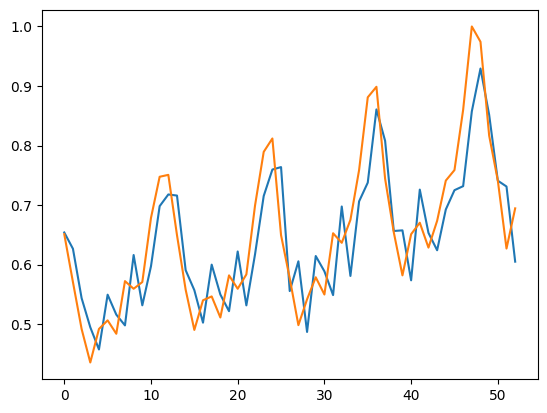

In [103]:
plt.plot(pr)
plt.plot(y_test)

In [104]:
mean_squared_error(y_test, pr)

0.004489577354744304

In [119]:
x_all, y_all = make_dataset(y, step)
x_all = x_all.reshape(x_all.shape[0], x_all.shape[1], 1)

In [120]:
x_all

array([[[0.18006431],
        [0.18971061],
        [0.21221865],
        [0.2073955 ],
        [0.19453376]],

       [[0.18971061],
        [0.21221865],
        [0.2073955 ],
        [0.19453376],
        [0.2170418 ]],

       [[0.21221865],
        [0.2073955 ],
        [0.19453376],
        [0.2170418 ],
        [0.23794212]],

       [[0.2073955 ],
        [0.19453376],
        [0.2170418 ],
        [0.23794212],
        [0.23794212]],

       [[0.19453376],
        [0.2170418 ],
        [0.23794212],
        [0.23794212],
        [0.21864952]],

       [[0.2170418 ],
        [0.23794212],
        [0.23794212],
        [0.21864952],
        [0.19131833]],

       [[0.23794212],
        [0.23794212],
        [0.21864952],
        [0.19131833],
        [0.16720257]],

       [[0.23794212],
        [0.21864952],
        [0.19131833],
        [0.16720257],
        [0.18971061]],

       [[0.21864952],
        [0.19131833],
        [0.16720257],
        [0.18971061],
        [0.18488

In [121]:
y_all

array([0.2170418 , 0.23794212, 0.23794212, 0.21864952, 0.19131833,
       0.16720257, 0.18971061, 0.18488746, 0.20257235, 0.2266881 ,
       0.2170418 , 0.20096463, 0.23954984, 0.2733119 , 0.2733119 ,
       0.25401929, 0.21382637, 0.18327974, 0.22508039, 0.23311897,
       0.24115756, 0.28617363, 0.26205788, 0.27652733, 0.28617363,
       0.31993569, 0.31993569, 0.29581994, 0.26045016, 0.23472669,
       0.26688103, 0.27491961, 0.28938907, 0.31028939, 0.29099678,
       0.29421222, 0.35048232, 0.36977492, 0.38906752, 0.33601286,
       0.30707395, 0.27652733, 0.31189711, 0.31511254, 0.31511254,
       0.37942122, 0.3778135 , 0.3681672 , 0.39067524, 0.4244373 ,
       0.43729904, 0.38102894, 0.3392283 , 0.28938907, 0.32315113,
       0.32797428, 0.3022508 , 0.3778135 , 0.36495177, 0.37620579,
       0.4244373 , 0.48553055, 0.47106109, 0.41639871, 0.3681672 ,
       0.32636656, 0.3681672 , 0.38906752, 0.37459807, 0.42926045,
       0.43247588, 0.4340836 , 0.50643087, 0.585209  , 0.55787

In [122]:
pr_all = model.predict(x_all)
pr_all

5/5 [==============================] - 0s 2ms/step


array([[0.22550265],
       [0.25237808],
       [0.27039057],
       [0.26705664],
       [0.24813735],
       [0.22481738],
       [0.20440884],
       [0.22908026],
       [0.21712436],
       [0.23565105],
       [0.2576627 ],
       [0.24488507],
       [0.23214853],
       [0.27729213],
       [0.30564302],
       [0.29949188],
       [0.28176516],
       [0.2449485 ],
       [0.22180508],
       [0.2686843 ],
       [0.26459858],
       [0.27227414],
       [0.3208175 ],
       [0.28410077],
       [0.3131749 ],
       [0.31788903],
       [0.35687786],
       [0.3453433 ],
       [0.3227544 ],
       [0.29119584],
       [0.272123  ],
       [0.3113284 ],
       [0.30700165],
       [0.3226651 ],
       [0.34243223],
       [0.31608102],
       [0.3299543 ],
       [0.3921736 ],
       [0.39448312],
       [0.41787404],
       [0.3470074 ],
       [0.34307447],
       [0.30956167],
       [0.35981122],
       [0.3442116 ],
       [0.3470882 ],
       [0.4219028 ],
       [0.393

In [130]:
y

array([0.18006431, 0.18971061, 0.21221865, 0.2073955 , 0.19453376,
       0.2170418 , 0.23794212, 0.23794212, 0.21864952, 0.19131833,
       0.16720257, 0.18971061, 0.18488746, 0.20257235, 0.2266881 ,
       0.2170418 , 0.20096463, 0.23954984, 0.2733119 , 0.2733119 ,
       0.25401929, 0.21382637, 0.18327974, 0.22508039, 0.23311897,
       0.24115756, 0.28617363, 0.26205788, 0.27652733, 0.28617363,
       0.31993569, 0.31993569, 0.29581994, 0.26045016, 0.23472669,
       0.26688103, 0.27491961, 0.28938907, 0.31028939, 0.29099678,
       0.29421222, 0.35048232, 0.36977492, 0.38906752, 0.33601286,
       0.30707395, 0.27652733, 0.31189711, 0.31511254, 0.31511254,
       0.37942122, 0.3778135 , 0.3681672 , 0.39067524, 0.4244373 ,
       0.43729904, 0.38102894, 0.3392283 , 0.28938907, 0.32315113,
       0.32797428, 0.3022508 , 0.3778135 , 0.36495177, 0.37620579,
       0.4244373 , 0.48553055, 0.47106109, 0.41639871, 0.3681672 ,
       0.32636656, 0.3681672 , 0.38906752, 0.37459807, 0.42926

In [133]:
all = np.array([np.nan] * len(y))
for i in range(step,len(y)):
    all[i] = pr_all[i-step]

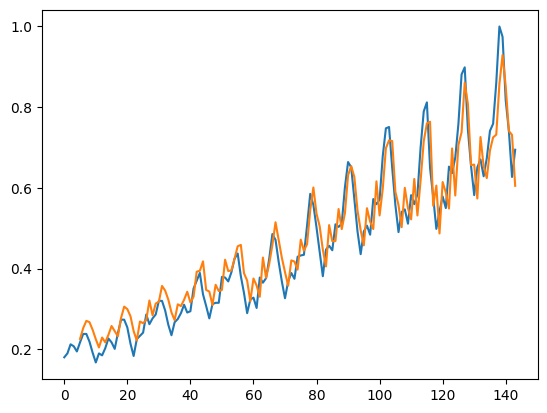

In [134]:
plt.plot(y)
plt.plot(all)